# Beschreibung des Projekts

Unser Projekt ist eine Anwendung zur Analyse und Visualisierung von Wettervorhersagen-Daten der One Call API von OpenWeatherMap. Es besteht aus mehreren Modulen und Klassen, die spezifische Aufgaben übernehmen, um die Wetterdaten effizient zu verarbeiten und darzustellen.

## Module und Klassen

- `Singleton`: Klasse die nur einmal instanziert werden kann
- `WeatherDataFetcher` (Singleton): Abrufen von Wetterdaten von der One Call API.
- `WeatherHelper`: Aufbereitung der Wetterdaten für die Visualisierung.
- `WeatherPlotter`: Visualisierung der Wetterdaten in Diagrammen.
- `LocationWeatherData`: Wetterdaten eines Orts
- `TemperatureData`: Temperaturinformationen
- `PrecipitationData`: Niederschlagsdaten
- `WindData`: Winddaten

## Workflow
1. Koordinaten eines Orts mit der `WeatherDataFetcher`-Klasse suchen (API-Anfrage).  
2. Wettervorhersagedaten dieser Koordinaten mit der `WeatherDataFetcher`-Klasse suchen (API-Anfrage) und in ein `LocationWeatherData`-Objekt umwandeln.  
3. Das `LocationWeatherData`-Objekt mit der `WeatherHelper`-Klasse in ein pandas Dataframe umwandeln.  
4. Falls nötig, die DataFrames mit der `WeatherAnalyzer`-Klasse normalisieren (Datum).  
5. Diagramme anhand der Dataframes mit der `WeatherPlotter`-Klasse anzeigen.  


In [1]:
from weather import WeatherHelper
from weather import WeatherDataFetcher
from weather import WeatherPlotter

# Instanzen der Klassen erstellen
fetcher  = WeatherDataFetcher()
helper   = WeatherHelper()   
plotter  = WeatherPlotter()

### Beispiel API

Rapperswil:
         date  temp_morning  temp_day  temp_evening  temp_night  temp_min  temp_max  temp_avg  rain  snow  probability  wind_speed  wind_degrees
0  13.05.2025         12.24     19.63         17.41       11.59     10.82     20.91   15.2175  0.27     0         0.84        2.17           154
1  14.05.2025          9.34     20.53         19.38       11.21      7.63     21.46   15.1150  0.00     0         0.00        2.53           326
2  15.05.2025         10.41     20.73         12.15        8.96      8.74     21.67   13.0625  1.11     0         0.85        3.95             1
3  16.05.2025          8.80     17.65         13.25        8.76      5.92     17.85   12.1150  0.00     0         0.00        3.95            26
4  17.05.2025         11.73     19.78         14.98       11.70      7.76     20.18   14.5475  0.00     0         0.00        4.09           354
5  18.05.2025         12.09     20.44         15.73       10.12      7.21     21.03   14.5950  0.00     0         0.00

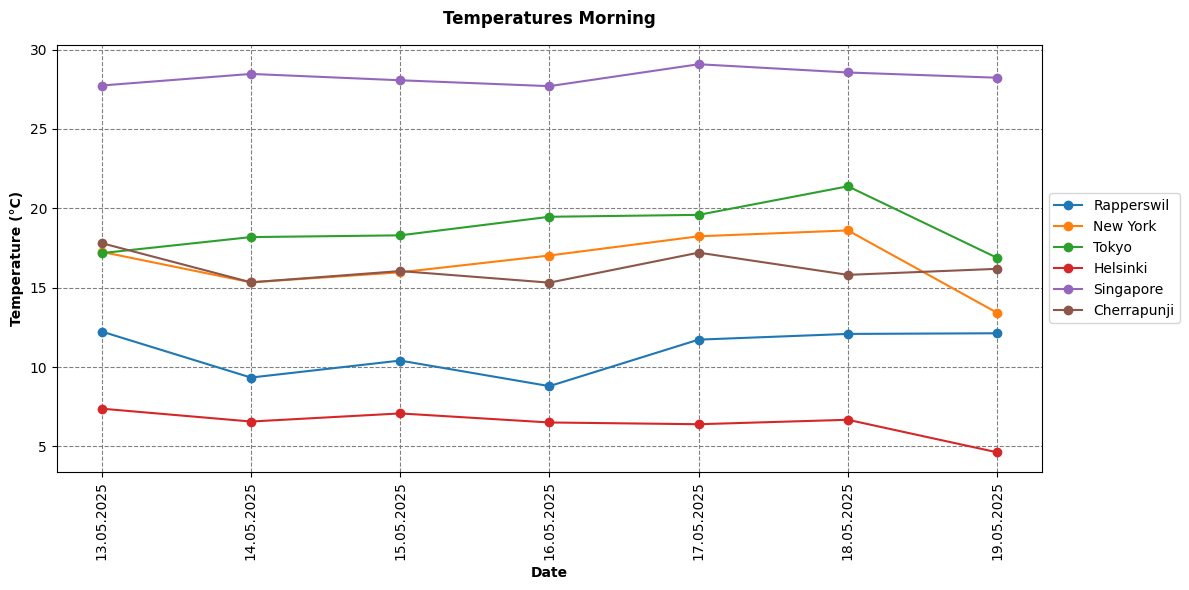

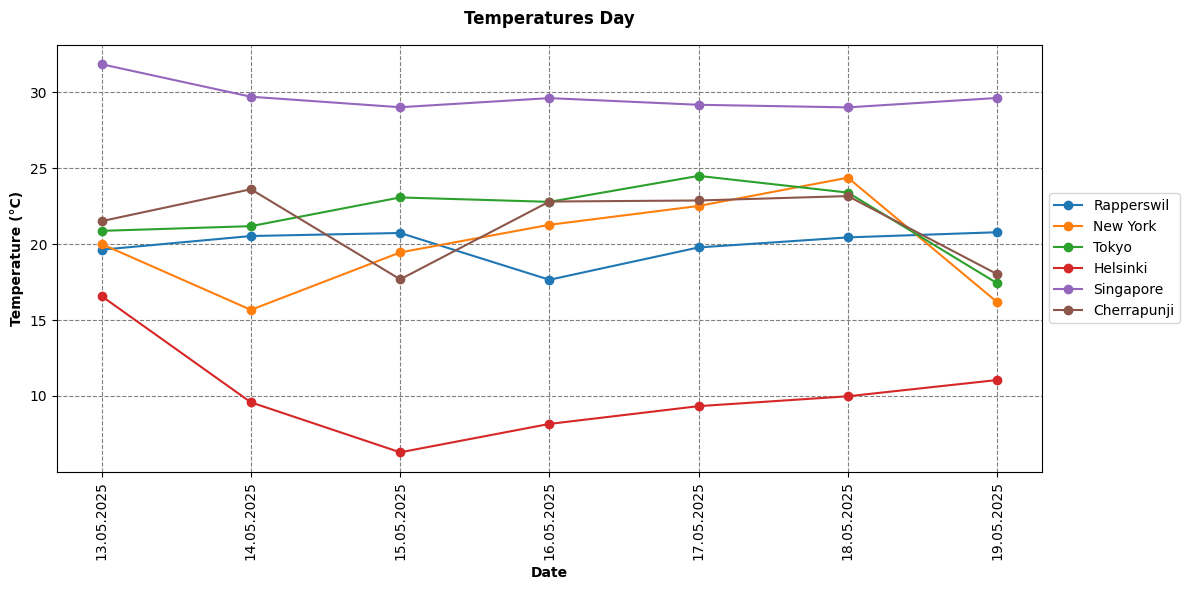

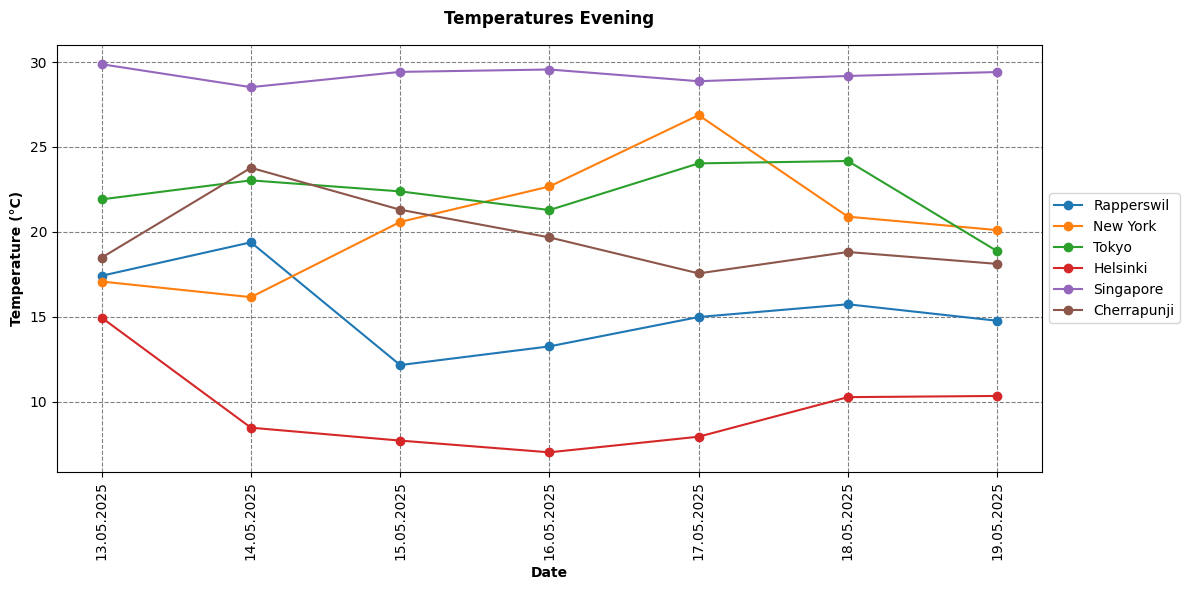

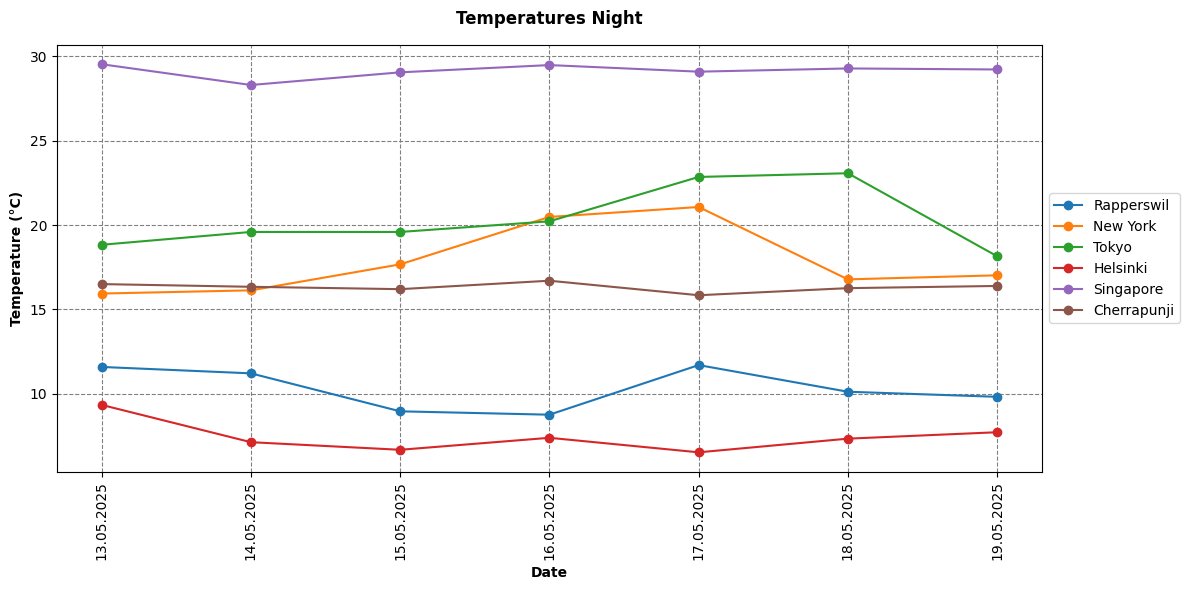

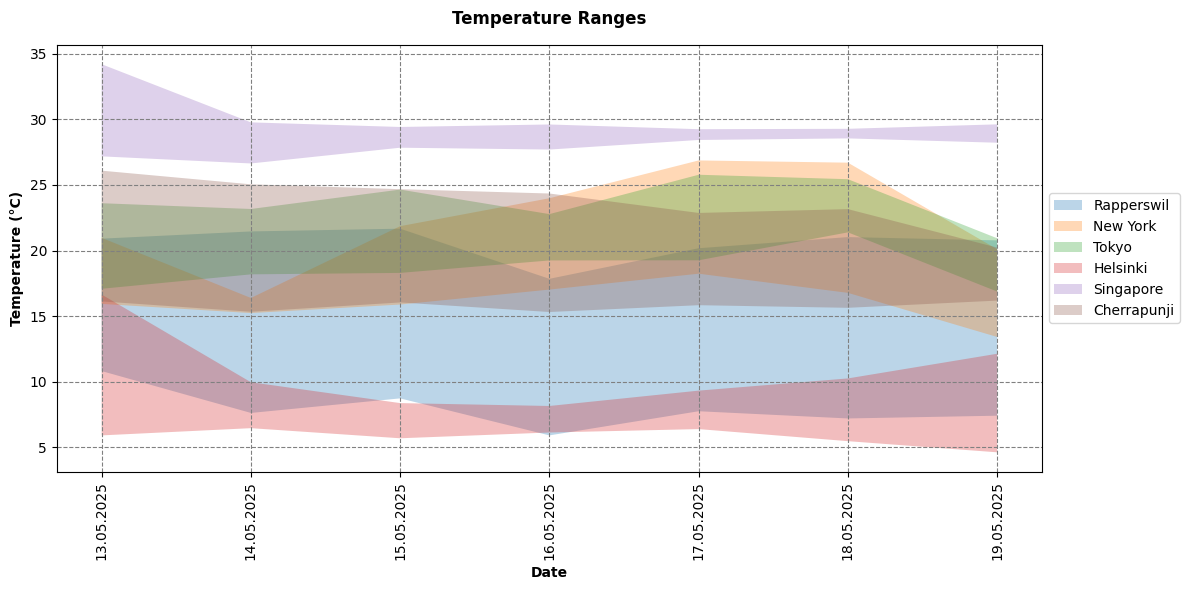

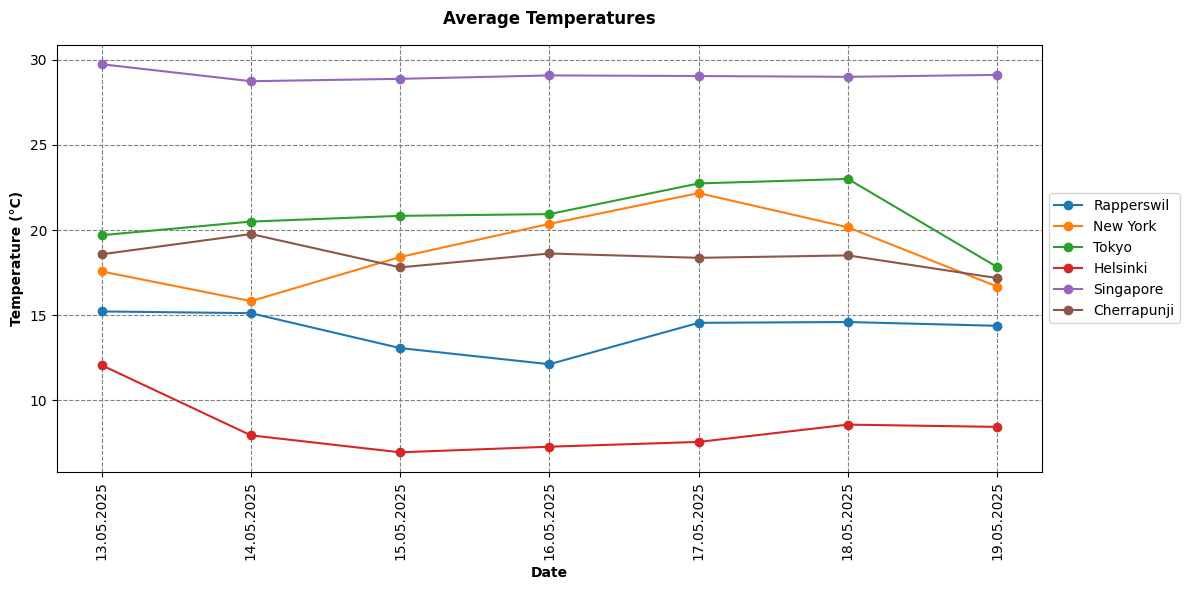

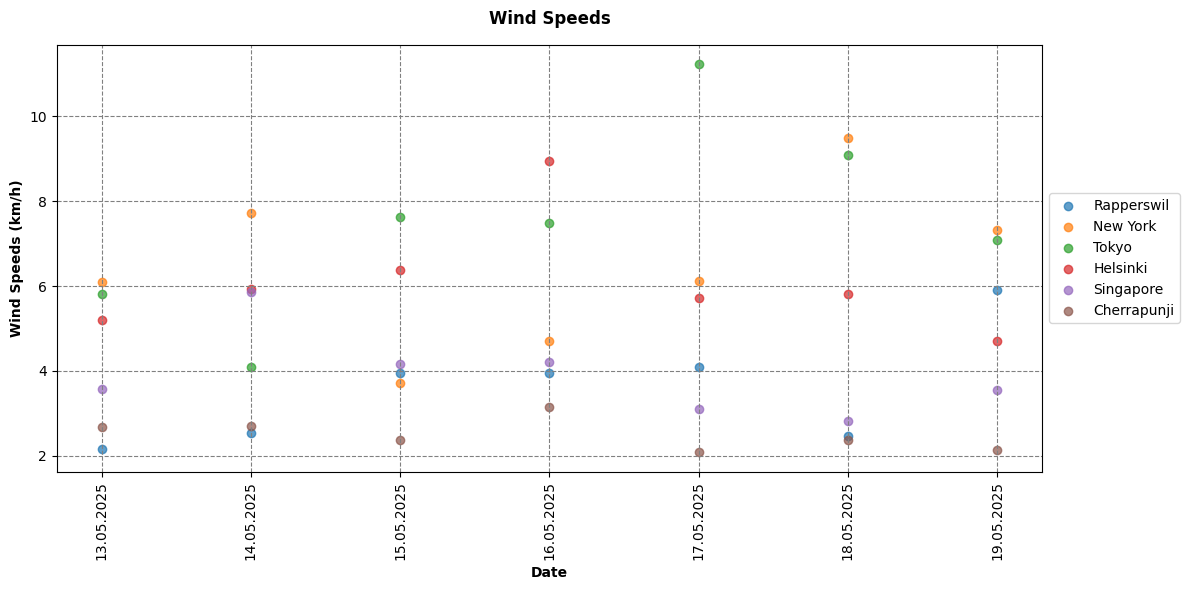

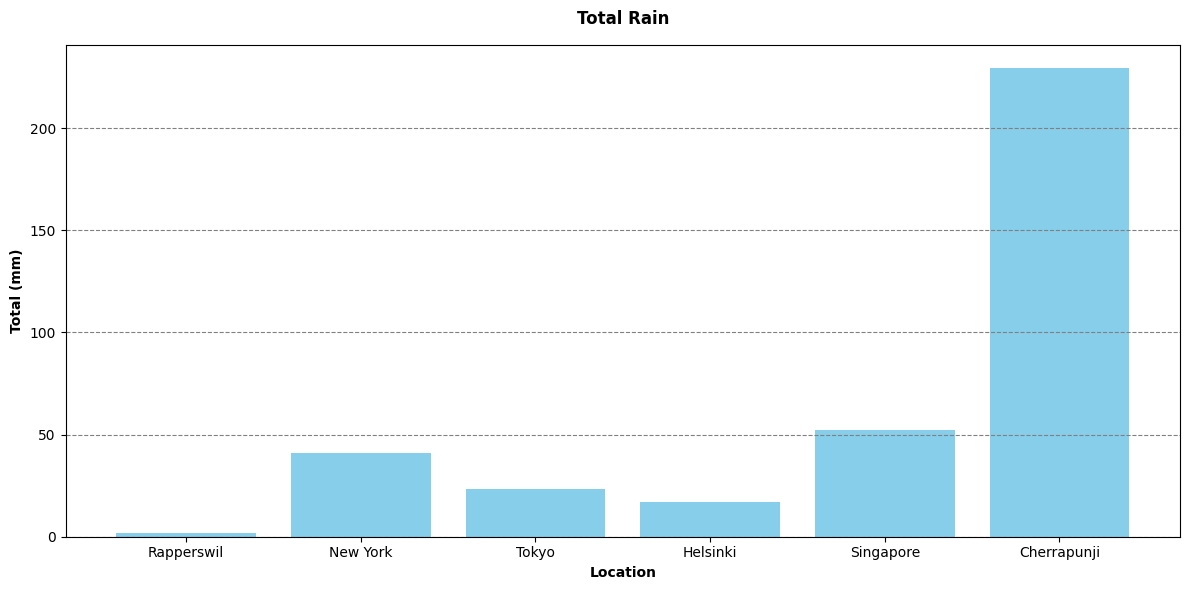

In [2]:
locations = [
    {"name": "Rapperswil", "state_code": "SG",  "country_code": "CH"},
    {"name": "New York",   "state_code": "NY",  "country_code": "US"},
    {"name": "Tokyo",      "state_code": "13",  "country_code": "JP"},
    {"name": "Helsinki",   "state_code": "UUS", "country_code": "FI"},
    {"name": "Singapore",  "state_code": "SG",  "country_code": "SG"},
    {"name": "Cherrapunji", "state_code": "ML", "country_code": "IN"}
]

forecast_data_instances = []
forecast_dataframes     = []

for location in locations:
    # Verwenden Sie den Fetcher, um die Koordinaten für den Standort abzurufen
    coordinates = fetcher.get_location_coordinates(location.values())

    if coordinates:
        # Wenn die Koordinaten erfolgreich abgerufen wurden, holen Sie die Wettervorhersage
        location_weather_data = fetcher.get_weather_locaiton_forecast_data_by_coordinates(location["name"], coordinates[0], coordinates[1])

        if location_weather_data:
            # Wenn die Wettervorhersage erfolgreich abgerufen wurde, erstellen Sie ein DataFrame
            forecast_dataframe = helper.create_dataframe(location_weather_data)

            # Speichern Sie die LocationWeatherData-Instanz und das entsprechende DataFrame in einer Liste
            forecast_data_instances.append(location_weather_data)
            forecast_dataframes.append(forecast_dataframe)
        else:
            # Behandeln Sie den Fall, in dem die Wettervorhersage nicht abgerufen werden konnte
            print(f"Wettervorhersagedaten für {location} konnten nicht abgerufen werden.")
            continue
    else:
        # Behandeln Sie den Fall, in dem die Koordinaten nicht abgerufen werden konnten
        print(f"Koordinaten für {location} konnten nicht abgerufen werden.")
        continue

# Normalisieren Sie die Datumswerte der DataFrames
normalized_dataframes = helper.normalize_dataframes_on_date(forecast_dataframes)

# Erstellen Sie ein Dictionary, um die Wetterdaten für jeden Standort zu speichern
location_data = {}

# Iterieren Sie über die Liste der Wetterdaten-Instanzen und normalisierten DataFrames
for i in range(len(forecast_data_instances)):
    location_name = locations[i]["name"]  # Standortname abrufen
    location_data[location_name] = normalized_dataframes[i]  # Standortname mit seinem DataFrame verknüpfen

# Wetterdaten für jeden Standort ausgeben
for location in location_data:
    print("=" * 40)
    print(f"{location}:")  # Standortname ausgeben
    print("=" * 40)
    print(location_data[location].to_string())  # DataFrame als String ausgeben

# Temperaturen zu verschiedenen Tageszeiten plotten
plotter.plot_temperatures_by_time_of_day(location_data, "morning")
plotter.plot_temperatures_by_time_of_day(location_data, "day")    
plotter.plot_temperatures_by_time_of_day(location_data, "evening")
plotter.plot_temperatures_by_time_of_day(location_data, "night")  

# Minimale und maximale Temperaturen plotten
plotter.plot_min_max_temperatures(location_data)

# Durchschnittstemperaturen plotten
plotter.plot_avg_temperatures(location_data)

# Windgeschwindigkeit plotten
plotter.plot_wind_speed(location_data)

# Gesamtniederschlag plotten
plotter.plot_total_rain(location_data)